In [22]:
import numpy as np
import sys
sys.path.append('../')
from datasets.load import loadDataset
import sys,os,glob
sys.path.append('../')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize']=15
mpl.rcParams['legend.fontsize']=15
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle

short_names = {}
if os.path.exists('../../optvaeutils/default-hmap.pkl'):
    short_names = readPickle('../../optvaeutils/default-hmap.pkl')[0]
colors = {}
colors[0] = 'r'
colors[1] = 'b'
colors[2] = 'g'
colors[3] = 'k'
colors[4] = 'y'
colors[5] = 'k'
colors[6] = 'm'
colors[7] = 'c'
colors[8] = 'b'

markers = {}
markers[0]= '*'
markers[1]= '<'
markers[2]= '>'
markers[3]= '8'
markers[4]= 'p'
markers[5]= 'v'
markers[6]= '3'
markers[7]= '2'
markers[8]= '4'
from sklearn.decomposition import PCA,RandomizedPCA
import cPickle as pickle
mnist = loadDataset('binarized_mnist')

Found:  /data/ml2/rahul/theanomodels/datasets/mnist/proc-bmnist.h5


In [26]:
if os.path.exists('../expt/evalBMNIST/mnistPCA.pkl'):
    print 'Loading.'
    with open('../expt/evalBMNIST/mnistPCA.pkl','rb') as f:
        pca  = pickle.load(f)
else:
    print 'Fitting.'
    pca = PCA(n_components=20)
    pca.fit(mnist['train'])
    with open('../expt/evalBMNIST/mnistPCA.pkl','wb') as f:
        pickle.dump(pca, f)

Loading.


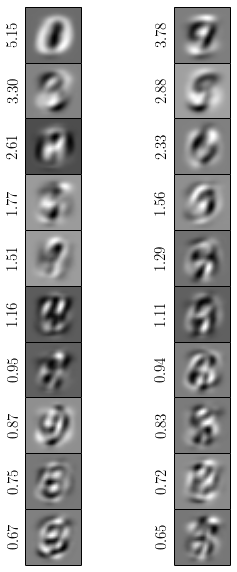

In [35]:
fig,axlist = plt.subplots(10,2,figsize=(8,10))
plt.subplots_adjust(wspace=-0.5, hspace=0)
for ax,img,var in zip(axlist.ravel(),pca.components_,pca.explained_variance_):
    ax.imshow(img.reshape(28,28),cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('%.2f'%var)

In [36]:
ejacob = np.load('../expt/evalBMNIST/30-10-2016-ejacob.npy')
mjacob = np.load('../expt/evalBMNIST/30-10-2016-mjacob.npy')

In [37]:
print ejacob.shape,mjacob.shape

(784, 100) (784, 100)


In [10]:
def color_grid_vis(X, (nh, nw)):
    h, w = X[0].shape[:2]
    img = np.zeros((h*nh, w*nw))
    for n, x in enumerate(X):
        j = n/nw
        i = n%nw
        img[j*h:j*h+h, i*w:i*w+w] = x
    return img
def reshapeMat(mat):
    return mat.reshape(28,28,-1).transpose(2,0,1)

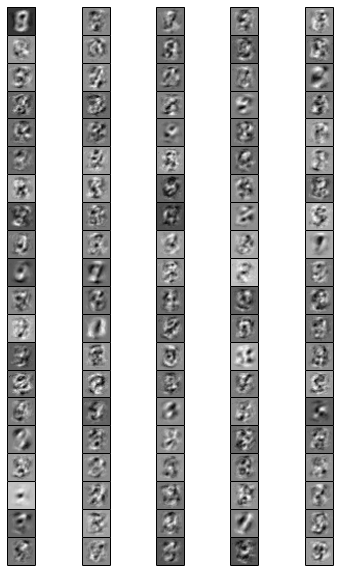

In [39]:
#Plotting the original ejacob across dimensions
fig,axlist = plt.subplots(20,5,figsize=(8,10))
plt.subplots_adjust(wspace=-0.5, hspace=0)
for ax,img in zip(axlist.ravel(),ejacob.T):
    ax.imshow(img.reshape(28,28),cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

In [40]:
pca_e = PCA(n_components=20)
pca_e.fit(ejacob.T)
print pca_e.components_.shape

(20, 784)


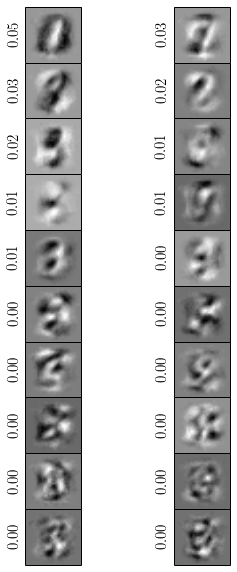

In [41]:
fig,axlist = plt.subplots(10,2,figsize=(8,10))
plt.subplots_adjust(wspace=-0.5, hspace=0)
for ax,img,var in zip(axlist.ravel(),pca_e.components_,pca_e.explained_variance_):
    ax.imshow(img.reshape(28,28),cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('%.2f'%var)

In [42]:
pca_m = PCA(n_components=20)
pca_m.fit(mjacob.T)
print pca_m.components_.shape

(20, 784)


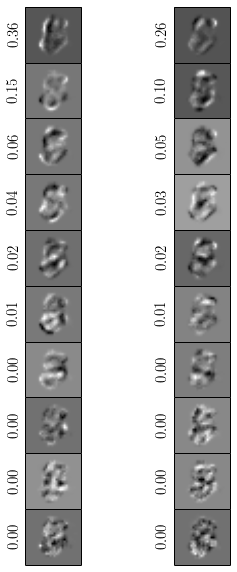

In [43]:
fig,axlist = plt.subplots(10,2,figsize=(8,10))
plt.subplots_adjust(wspace=-0.5, hspace=0)
for ax,img,var in zip(axlist.ravel(),pca_m.components_,pca_m.explained_variance_):
    ax.imshow(img.reshape(28,28),cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('%.2f'%var)